# ch10_10 카이 제곱 검정

t-test를 이용해서 두 집단의 평균이 같은지 다른지를 검정할 수 있었습니다. 이 때, 독립 변수는 성별과 같은 범주형 변수, 종속 변수는 수학 점수와 같은 연속형 변수였습니다. 그런데 종속 변수가 범주형 일 때는 어떻게 해야할까요? 성별과 혈액형의 예시로 돌아가보겠습니다.

| 성별 | M | F | F | M | F | F | M | F | F | M | M | M | F | F | M | M | M | F | F | M |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 혈액형 | A | B | B | O | O | A | AB | A | B | B | B | B | B | A | O | A | O | AB | A | B |

성별과 혈액형 데이터 셋이 있습니다. 여기서 독립 변수는 성별, 종속 변수는 혈액형으로 잡고, 두 변수 사이에 상관 관계가 있는지, 두 변수는 서로 독립인지 알고 싶다면 어떻게 하면 좋을까요? 이 때 활용할 수 있는 기법이 카이 제곱 검정입니다.

## 기대 빈도 구하기
주어진 데이터를 분할표로 표기하고, 두 변수가 독립임을 가정하고 기대 빈도를 계산하면 아래처럼 표현할 수 있습니다.

|  | A | B | O | AB | 합 |
| --- | --- | --- | --- | --- | --- |
| F | 4(3) | 4(4) | 1(2) | 1(1) | 10 |
| M | 2(3) | 4(4) | 3(2) | 1(1) | 10 |
| 합 | 6 | 8 | 4 | 2 | 20 |

기대 빈도와 일치하는 값도 있고, 그렇지 않은 값도 있습니다. 이 표만 보고 두 변수는 독립이라고 얘기할 수 있을까요? 이를 통계적으로 검정하기 위해서 먼저 가설을 세워보겠습니다.

## 귀무 가설, 대립 가설 설정

우리가 알고 싶은건 두 변수가 독립인지 여부입니다. 통계적 가설을 세워보면 아래와 같습니다.

귀무가설: 두 변수는 독립이다. 즉, 기대 빈도와 관측 빈도는 동일하다.  
대립가설: 두 변수는 독립이 아니다. 즉, 기대 빈도와 관측 빈도는 다르다.  

$$H_0: \text{The variables are independent}$$
$$H_1: \text{The variables are dependent}$$

이제 가설을 세웠으니, 검정 통계량을 설정하고 분포표를 이용해 p-value를 계산하여 유의 수준과 비교하면 됩니다. 카이 제곱 검정에서는 카이 제곱 통계량과 카이 제곱 분포를 사용합니다.

## 카이 제곱 분포

카이 제곱 분포를 먼저 살펴보겠습니다. 말만 어렵지, 사실 매우 단순한 확률 분포입니다. 카이는 그리스 문자로 "X"를 가리킵니다. 카이 제곱은 그러면 X 제곱이겠죠? 카이 제곱 분포는 k개의 서로 독립 적인 표준 정규 확률 변수를 각각 제곱한 다음, 합해서 얻어지는 분포가 됩니다. 확률 밀도 함수는 아래 처럼 생겼습니다.

$$f(x; k)=\frac{1}{2^{k/2} \Gamma(k/2)} x^{\frac{k}{2}-1} e^{-\frac{x}{2}} (x\geq0)$$


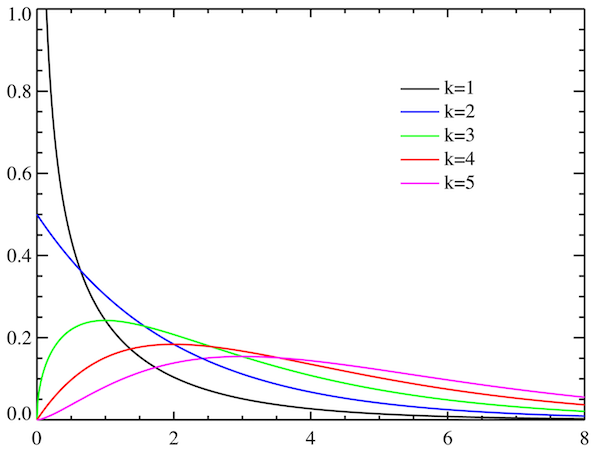

늘 그렇듯 수식을 보고 겁먹을 필요가 전혀 없습니다. 분포의 형태가 k 값에 의해서 결정된다는 것만 알면 됩니다. 카이제곱 분포는 k개의 표준 정규 분포를 따르는 확률 변수들의 제곱합의 분포였습니다. 바로 이 k 값에 의해서 카이제곱 분포의 형태가 결정됩니다. 쉬운 이해를 위해서 간단한 시뮬레이션을 해보겠습니다. 

표준 정규 분포를 따른 확률 변수를 k개 샘플링하여 제곱합을 구한 뒤, 히스토그램을 그려서 카이 제곱 분포를 따르는지 확인하겠습니다.

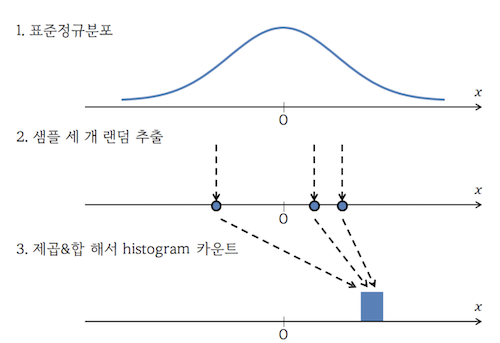

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2

In [3]:
def get_squared_sum_list(k):
    squared_sum_list = []
    for i in range(20000):
        squared_sum = (np.random.randn(k) ** 2).sum()
        squared_sum_list.append(squared_sum)
    return squared_sum_list

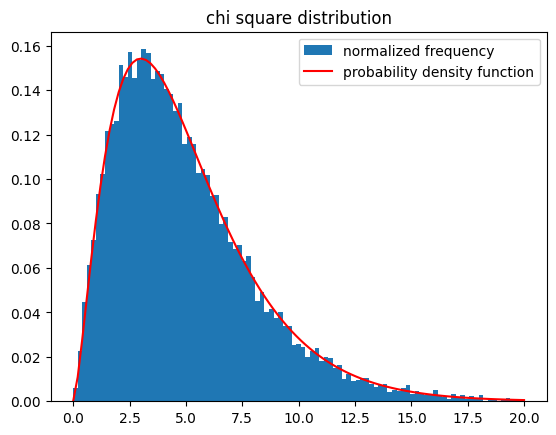

In [8]:
k = 5 
x = np.linspace(0, 20, 100)
pdf = chi2.pdf(x, k) 
squared_sum_list = get_squared_sum_list(k=k) 
_ = plt.hist(squared_sum_list, bins=x, density=True, label="normalized frequency")
plt.plot(x, pdf, color="red", label="probability density function")
plt.title("chi square distribution")
plt.legend()

표준 정규 분포로부터 무작위로 추출한 샘플들의 제곱의 합이 카이 제곱 분포를 따르는 것을 확인할 수 있습니다.

## 카이 제곱 통계량

우리가 알고 싶은 것은 관측 빈도가 기대 빈도와 동일한지 여부입니다. 그리고 각 범주마다 여러 개의 변수가 있었고, 모든 조합마다 기대 빈도와 관측 빈도 사이의 차를 구할 수 있었습니다. 이를 모두 표준화 한 뒤, 양수 음수 효과를 제거하기 위해 제곱합을 취해주면 카이 제곱 통계량을 구할 수 있습니다. 마치 분산을 계산하는 것과 비슷합니다.

$$O_{ij}:\text{실제 표본으로부터 얻어진 i번째, j번째 범주에 속하는 자료 개수, 관측 빈도}$$

$$E_{ij}:\text{표본수 n에 대해 i번째, j 번째 범주에 기대되는 개수, 기대 빈도}$$

$$\text{기대값과 관측값의 차이를 표준화 한 값}: \frac{O_{ij}-E_{ij}}{\sqrt{E_{i}}}$$

$$\text{표준화 한 값의 제곱 합}=\sum\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim\chi^2_{(I-1)(J-1)}$$

## p-value 계산 및 통계적 의사 결정
예제로 돌아와서, 성별과 혈액형이 서로 독립인지 여부를 직접 p-value를 계산하여 유의 수준과 비교해보겠습니다. 

In [10]:
import pandas as pd

df = pd.DataFrame(
    [ 
        ("M", "A"), ("F", "B"), ("F", "B"), ("M", "O"), ("F", "O"), ("F", "A"), ("M", "AB"), ("F", "A"), ("F", "B"), ("M", "B"), 
        ("M", "B"), ("M", "B"), ("F", "B"), ("F", "A"), ("M", "O"), ("M", "A"), ("M", "O"), ("F", "AB"), ("F", "A"), ("M", "B"),
    ],
    columns=["sex", "blood_type"],
)

In [11]:
contigency_table = pd.crosstab(df["sex"], df["blood_type"])
contigency_table

blood_type,A,AB,B,O
sex,,,,
F,4,1,4,1
M,2,1,4,3


In [19]:
from scipy.stats import chi2_contingency

chi2_statistics, p_value, dof, expected_freq = chi2_contingency(contigency_table)

In [20]:
chi2_statistics, dof, expected_freq

(1.6666666666666665,
 3,
 array([[3., 1., 4., 2.],
        [3., 1., 4., 2.]]))

In [21]:
p_value, p_value < 0.05

(0.6443698056370253, False)

p-value가 유의 수준 0.05 보다 크게 나왔습니다. 즉, 두 변수가 독립이라는 귀무 가설을 기각하지 못하므로 성별과 혈액형 두 변수는 독립입니다.

## 연습 문제

이전  챕터에서 예제로 살펴봤던 다이아몬드 데이터 셋의 clarity, cut 변수가 서로 독립인지 chi-square test를 통해서 검정해보세요.

In [22]:
import pandas as pd

df = pd.read_csv("./data/diamonds.csv")

In [24]:
df = df[["cut", "clarity"]]

In [26]:
df.isnull().sum()

cut        0
clarity    0
dtype: int64

In [27]:
contigency_table = pd.crosstab(df["cut"], df["clarity"])
contigency_table

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


In [28]:
from scipy.stats import chi2_contingency

chi2_statistics, p_value, dof, expected_freq = chi2_contingency(contigency_table)

In [29]:
p_value, p_value < 0.05

(0.0, True)

In [30]:
chi2_statistics

4391.398067200364

In [31]:
dof

28

In [32]:
expected_freq

array([[  22.11735261,   53.42788283,  389.96384872,  274.4223211 ,
         243.88783834,  365.87652948,  109.09436411,  151.20986281],
       [  67.39610679,  162.80571005, 1188.29977753,  836.22106044,
         743.17623285, 1114.90077864,  332.43288839,  460.76744531],
       [ 296.05656285,  715.17037449, 5219.94466073, 3673.33878383,
        3264.61292176, 4897.51868743, 1460.30598813, 2024.05202076],
       [ 189.45367075,  457.65461624, 3340.36735261, 2350.65728587,
        2089.1038376 , 3134.03926585,  934.48470523, 1295.23926585],
       [ 165.97630701,  400.94141639, 2926.4243604 , 2059.36054876,
        1830.21916945, 2745.6647386 ,  818.68205413, 1134.73140527]])

## 카이제곱 검정의 종류와 활용

앞서 살펴본 예제에서는 두 변수가 서로 독립인지를 검정하였습니다. 이 외에도 카이 제곱 검정의 종류는 몇 가지 더 있습니다.

- 적합도 검정(goodness of fit test): 하나의 범주형 변수가 예상한 분포에 들어맞는지 검정
    - 예시) 예상 시장 점유율과 실제 수집한 표본이 동일한지 검정
- 독립성 검정(test of independence): 두개의 범주형 변수가 서로 독립인지 검정
    - 예시) 성별과 혈액형이 서로 독립인지 검정
- 동질성 검정(test of homogeneity): 두개의 범주형 변수의 분포가 서로 동일한지 검정
    - 남학생과 여학생의 전공 분포가 동일한지 검정

이 중에서 우리가 살펴본 건 독립성 검정입니다. 다른 검정 기법이 필요할 경우, 관련 자료를 찾아보고 적절한 구현체를 찾아서 적용하면 됩니다.

## 정리
이번 챕터에서는 카이 제곱 검정의 필요성과 핵심적인 개념들에 대해서 알아보았습니다. 그리고 두 변수가 서로 독립인지 여부를 카이 제곱 검정을 이용해 입증해보았습니다. 다음 챕터에서는 실무에 가까운 데이터 셋을 가지고 카이 제곱 검정을 어떻게 적용할 수 있는지 알아보겠습니다.